# Problem Statement
Shared Bikes Demand Prediction - Assignment Solution
Problem Statement:
A US bike-sharing provider BoomBikes has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —

Which variables are significant in predicting the demand for shared bikes.

How well those variables describe the bike demands

#### The solution is divided into the following sections:

1. Data understanding and exploration
2. Data Visualisation
3. Data preparation
4. Model building and evaluation

## Reading and Understanding the Data

#### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data 

inp=pd.read_csv('day.csv')
inp.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the head of Data

inp.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the shape of Data

inp.shape

(730, 16)

In [5]:
# Data Description

inp.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Information of columns

inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Renaming 'yr','mnth','hum' columns

inp.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [8]:
# Checking head of Data

inp.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# check for missing values

inp.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
year          0.0
month         0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### there are non null values in the data set

In [10]:
inp.nunique()

instant       730
dteday        730
season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [11]:
# Mapping the season column
inp.season = inp.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Mapping the month column
inp.month = inp.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# Mapping the weekday column
inp.weekday = inp.weekday.map({0:'sunday',1:'monday',2:'tueday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'})

# Mapping the weathersit column
inp.weathersit = inp.weathersit.map({1:'Clear',2:'Misty',3:'LightSnow',4:'HeavySnow'})

In [12]:
# checking the Head of Data

inp.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,monday,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,tueday,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,friday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# Dropping Cloumns
# AS we seeing from the data set 'instant','dteday' is of no use 
# Same after analysing the dataset we conclude cnt is sum of casual and registered so we can drop casual and registered columns
   
inp.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)   


In [14]:
# Checking the head of the data
inp.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tueday,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# Checking the info 
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### Now our dataset is more readable and is ready for further Analysis

### Segregating the columns by Categorical And Numerical values

In [16]:
cat_cols=[]
num_cols=[]
for i in inp.columns:
    if inp[i].nunique()>30:
        num_cols.append(i)
    else:
        cat_cols.append(i)

In [17]:
# Numerical columns
inp[num_cols].head()

,temp,atemp,humidity,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
# Categorical columns
inp[cat_cols].head()

,season,year,month,holiday,weekday,workingday,weathersit
0,spring,0,jan,0,monday,1,Misty
1,spring,0,jan,0,tueday,1,Misty
2,spring,0,jan,0,wednesday,1,Clear
3,spring,0,jan,0,thursday,1,Clear
4,spring,0,jan,0,friday,1,Clear


# Visualisation Of The Data
## Categorical Columns

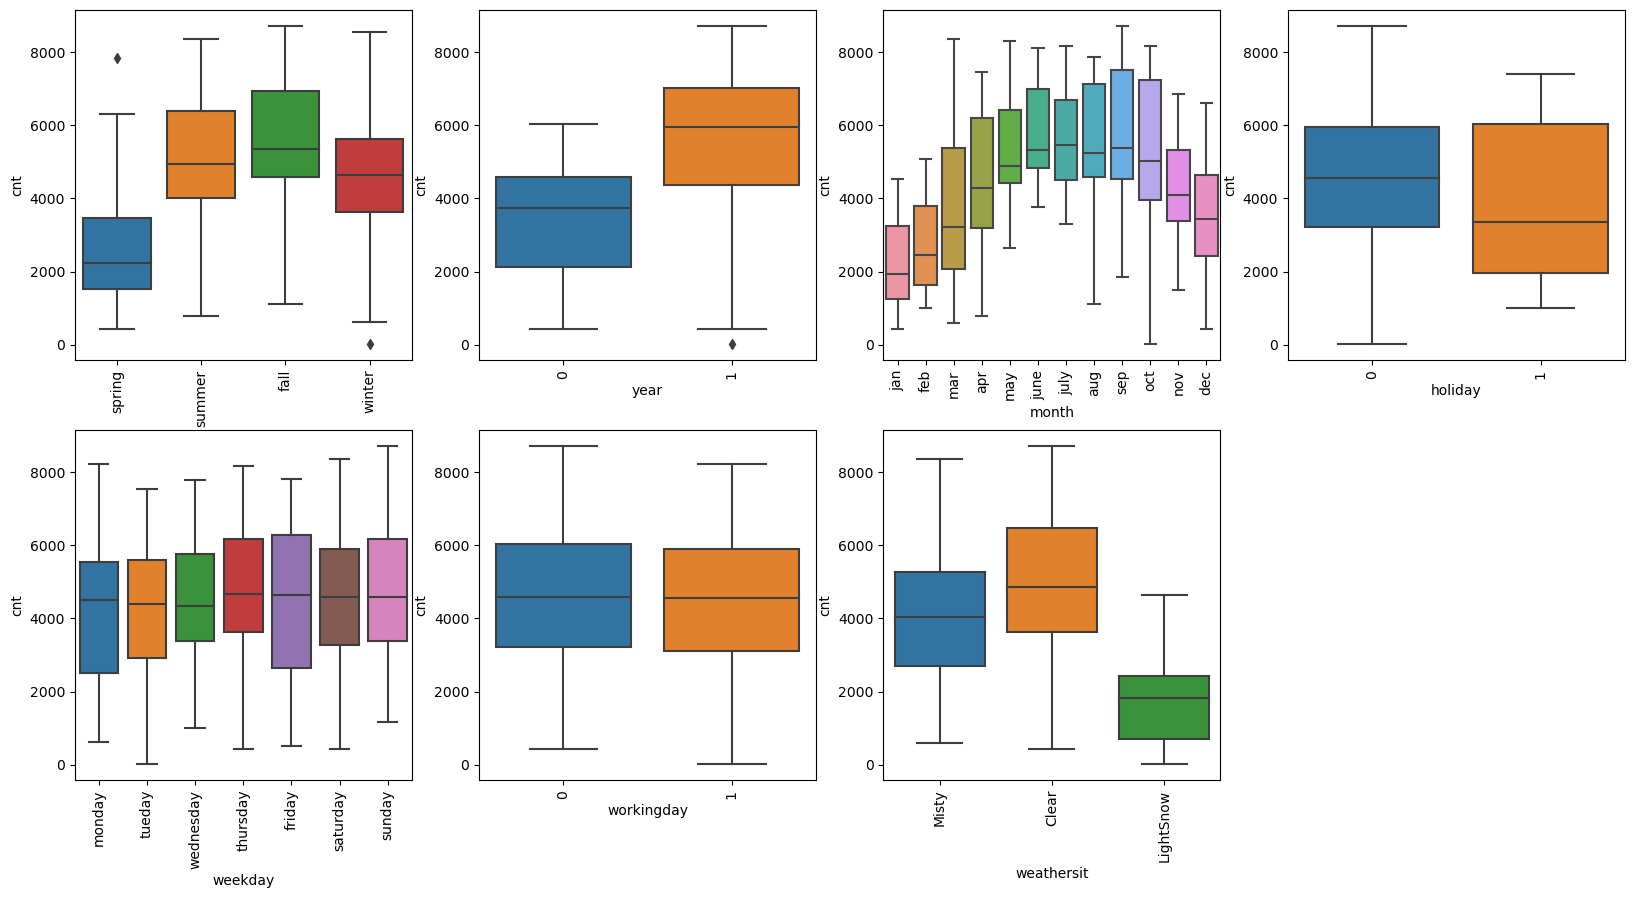

In [19]:
# Analysing Categorical Columns
# Predictor variable Vs Target Variable 
# Here Target Variable Is 'cnt'

plt.figure(figsize= (20,10))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt',data=inp)
plt.xticks(rotation = 90)
plt.subplot(2,4,2)
sns.boxplot(x='year',y='cnt',data=inp)
plt.xticks(rotation = 90)
plt.subplot(2,4,3)
sns.boxplot(x='month',y='cnt',data=inp)
plt.xticks(rotation = 90)
plt.subplot(2,4,4)
sns.boxplot(x='holiday',y='cnt',data=inp)
plt.xticks(rotation = 90)
plt.subplot(2,4,5)
sns.boxplot(x='weekday',y='cnt',data=inp)
plt.xticks(rotation = 90)
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='cnt',data=inp)
plt.xticks(rotation = 90)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit',y='cnt',data=inp)
plt.xticks(rotation = 90)
plt.show()


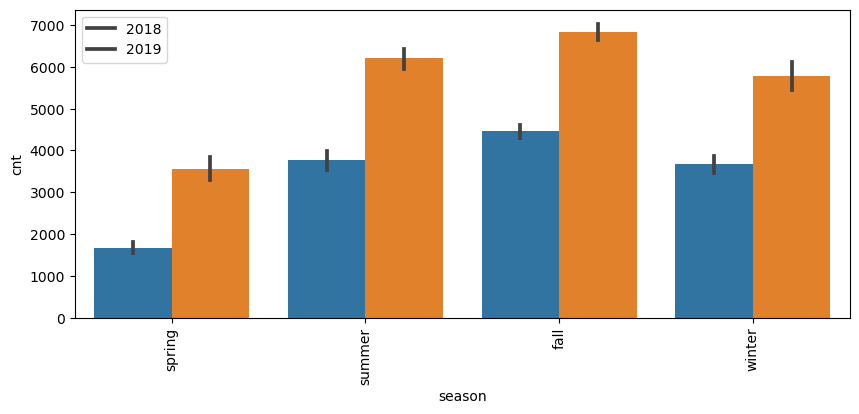

In [20]:
# Visualisation for season column

plt.figure(figsize=[10,4])
sns.barplot(x='season',y='cnt',hue='year',data=inp)
plt.xticks(rotation=90)
plt.legend(labels=['2018', '2019'])
plt.show()

#### Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

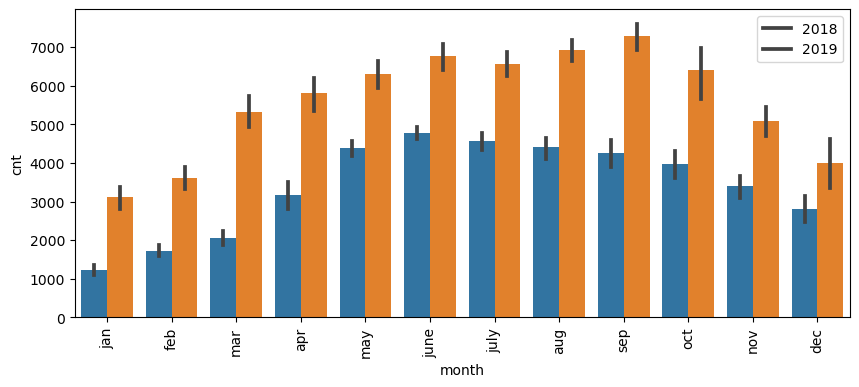

In [21]:
# Visualisation for month column

plt.figure(figsize=[10,4])
sns.barplot(x='month',y='cnt',hue='year',data=inp)
plt.xticks(rotation=90)
plt.legend(labels=['2018', '2019'])
plt.show()

#### Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tilll middle of the year and then it started decreasing as we approached to the end of year. Number of booking for each month seems to have increased from 2018 to 2019.

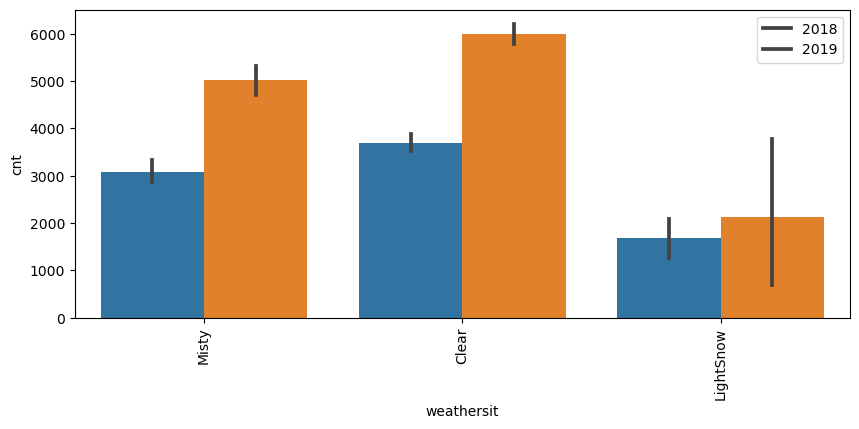

In [22]:
# Visualisation for weathersit column

plt.figure(figsize=[10,4])
sns.barplot(x='weathersit',y='cnt',hue='year',data=inp)
plt.xticks(rotation=90)
plt.legend(labels=['2018', '2019'])
plt.show()

#### Clear weather attracted more booking . And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

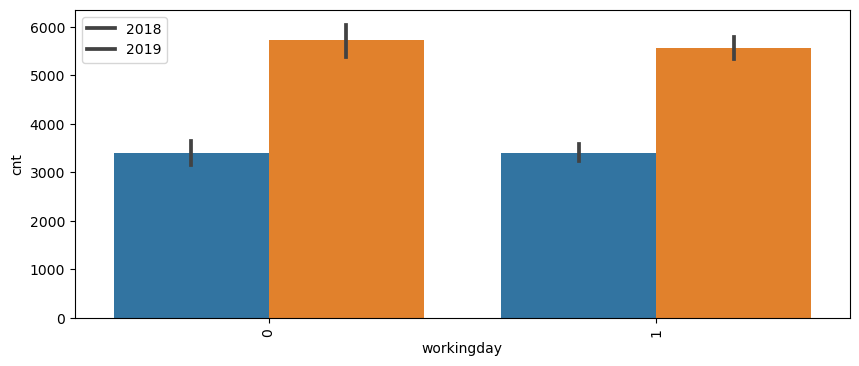

In [23]:
# Visualisation for workingday column

plt.figure(figsize=[10,4])
sns.barplot(x='workingday',y='cnt',hue='year',data=inp)
plt.xticks(rotation=90)
plt.legend(labels=['2018', '2019'])
plt.show()

#### Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.



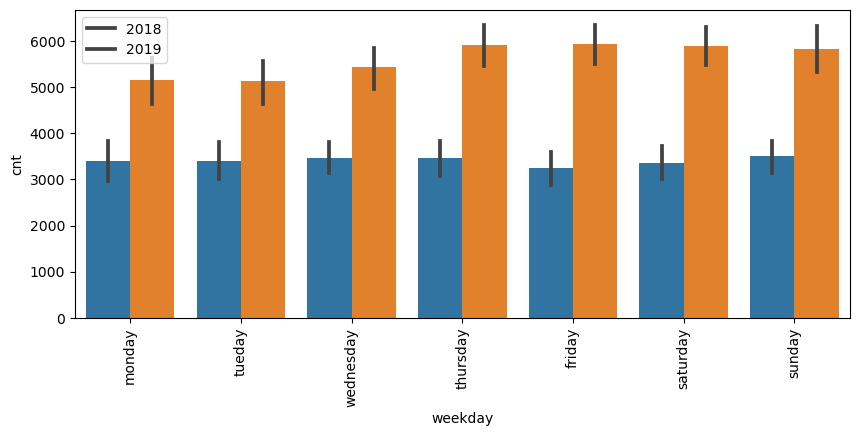

In [24]:
# Visualisation for weekday column

plt.figure(figsize=[10,4])
sns.barplot(x='weekday',y='cnt',hue='year',data=inp)
plt.xticks(rotation=90)
plt.legend(labels=['2018', '2019'])
plt.show()

####  Thursday, Friday, Saturday and Sunday have more number of bookings as compared to the start of the week.

# Visualisation Of The Data
## Numerical Columns

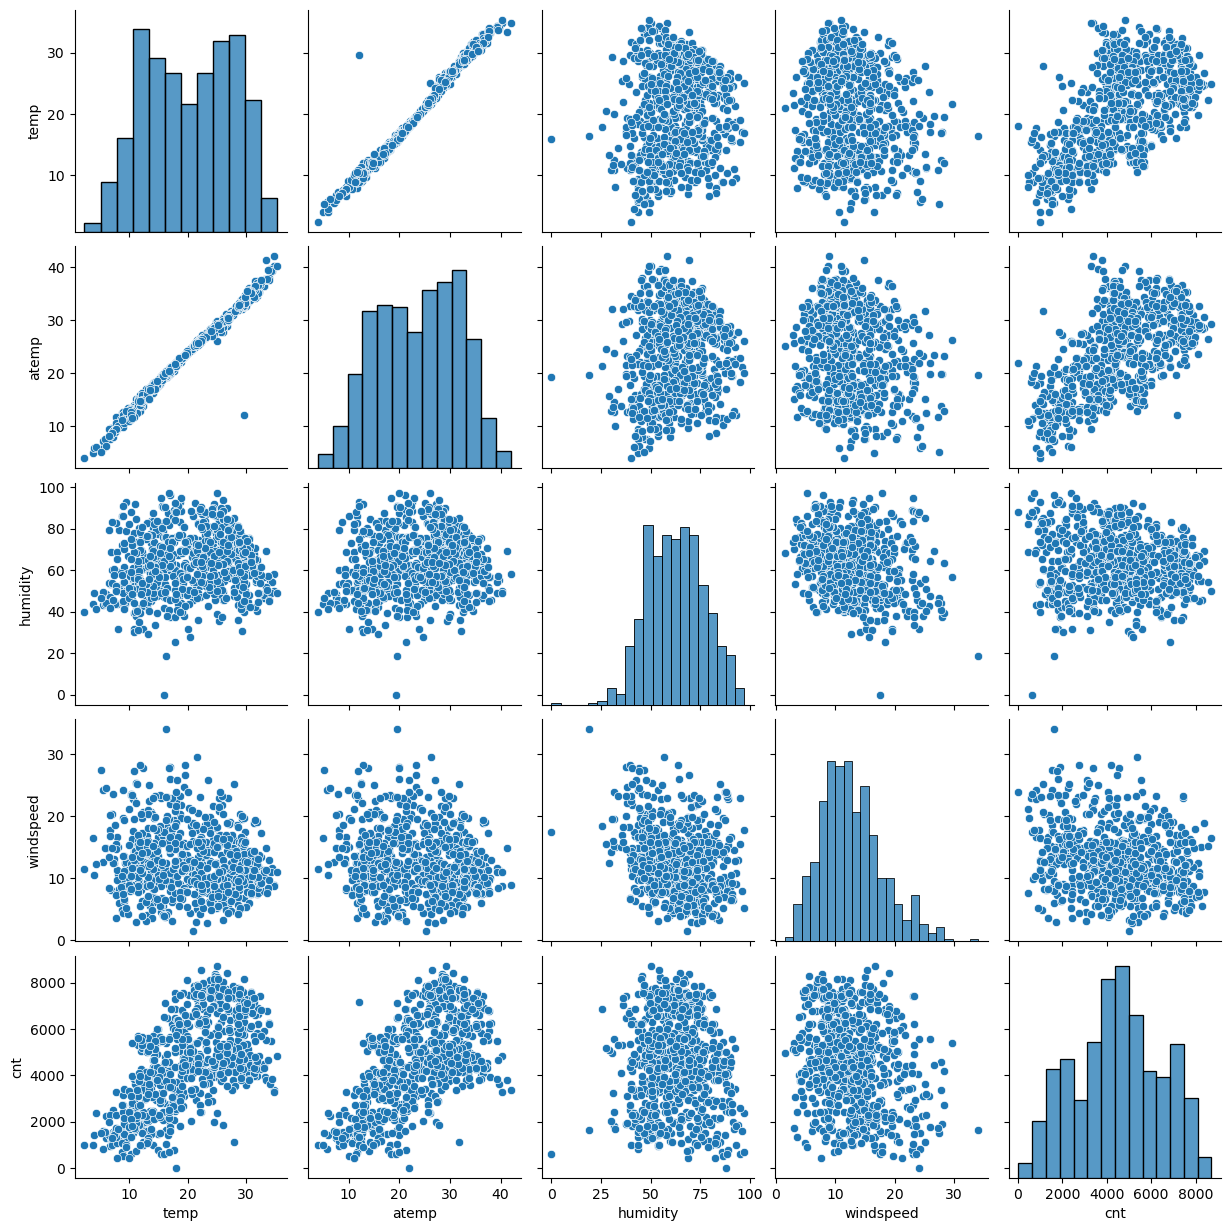

In [25]:
# visualizing the numerical columns
sns.pairplot(data=inp,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

In [26]:
## Correlation analysis of numerical variables
inp_corr=inp[['temp','atemp','humidity','windspeed','cnt']].corr()
inp_corr.head()

,temp,atemp,humidity,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


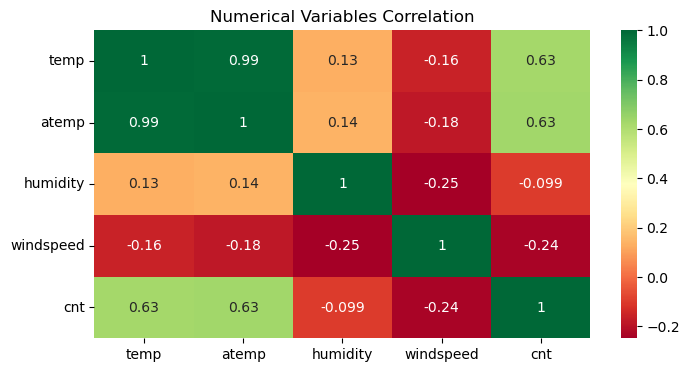

In [27]:
plt.figure(figsize=[8,4])
sns.heatmap(data = inp_corr, annot = True, cmap="RdYlGn")
plt.title("Numerical Variables Correlation")
plt.show()

#### There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables.Here we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

In [28]:
inp.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Data Preparation for Linear Regression

### Creating dummy variables for  categorical variables

In [29]:
inp[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   year        730 non-null    int64 
 2   month       730 non-null    object
 3   holiday     730 non-null    int64 
 4   weekday     730 non-null    object
 5   workingday  730 non-null    int64 
 6   weathersit  730 non-null    object
dtypes: int64(3), object(4)
memory usage: 40.1+ KB


In [30]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_inp=pd.get_dummies(inp.month,drop_first=True,dtype=int)
weekdays_inp=pd.get_dummies(inp.weekday,drop_first=True,dtype=int)
weathersit_inp=pd.get_dummies(inp.weathersit,drop_first=True,dtype=int)
seasons_inp=pd.get_dummies(inp.season,drop_first=True,dtype=int)

In [31]:
inp.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tueday,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [32]:
# Printing columns after creating dummies

inp.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

In [33]:
# Merging the dataframe

inp_new = pd.concat([inp,months_inp,weekdays_inp,weathersit_inp,seasons_inp],axis=1)

In [34]:
inp_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,monday,saturday,sunday,thursday,tueday,wednesday,LightSnow,Misty,spring,summer,winter
0,spring,0,jan,0,monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tueday,1,Misty,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [35]:
# Dropping the columns as we have created the dummy coluns out of it.

inp_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [36]:
# check the column info of new dataframe
inp_new.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'aug', 'dec', 'feb', 'jan', 'july', 'june', 'mar',
       'may', 'nov', 'oct', 'sep', 'monday', 'saturday', 'sunday', 'thursday',
       'tueday', 'wednesday', 'LightSnow', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')

In [37]:
#Checking Head of new DataFrame

inp_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,monday,saturday,sunday,thursday,tueday,wednesday,LightSnow,Misty,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
# checking the shape of new dataframe

inp_new.shape

(730, 30)

# Splitting the Data into Train and Test Sets

In [39]:
# Shape before Splitting
inp_new.shape


(730, 30)

In [40]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(inp_new, train_size = 0.7, test_size = 0.3, random_state = 100)


In [41]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [42]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,monday,saturday,sunday,thursday,tueday,wednesday,LightSnow,Misty,spring,summer,winter
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


# Scaling continuous variables

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [44]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,monday,saturday,sunday,thursday,tueday,wednesday,LightSnow,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0


In [45]:
# describing the dataset
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,monday,saturday,sunday,thursday,tueday,wednesday,LightSnow,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


### Dividing into X and Y sets for the model building

In [46]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

## Using RFE 
Recursive feature elimination

In [47]:
# Running RFE with the output number of the variable equal to 15

# Create a Linear Regression model
lm = LinearRegression()

# Create RFE object with 15 features to select
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit the RFE object to the data
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('monday', False, 9),
 ('saturday', False, 4),
 ('sunday', False, 5),
 ('thursday', False, 13),
 ('tueday', False, 8),
 ('wednesday', False, 11),
 ('LightSnow', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [49]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sep', 'LightSnow', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')

In [50]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct',
       'monday', 'saturday', 'sunday', 'thursday', 'tueday', 'wednesday'],
      dtype='object')

# Building A Linear Model

In [51]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [52]:
# Function for calculating the VIF of the variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [53]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,30.94
2,temp,17.80
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.81
11,Misty,2.32
0,year,2.09
8,nov,1.83
6,jan,1.75


## Model 1

In [54]:
# Adding constant
# Running the linear model
# Printing summary of the linear model

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()  
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          3.34e-189
Time:                        10:33:46   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

In [55]:
# As humidity shows high VIF value we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,63.34
12,spring,5.21
3,temp,4.10
14,winter,3.68
13,summer,2.73
8,nov,1.75
6,jan,1.67
5,dec,1.48
7,july,1.48
9,sep,1.33


## Model 2

In [56]:
lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.57e-186
Time:                        10:33:46   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2466      0.032      7.679      0.0

In [57]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,59.32
11,spring,5.04
3,temp,3.83
13,winter,3.45
12,summer,2.65
6,jan,1.64
7,july,1.48
8,sep,1.29
5,dec,1.25
4,windspeed,1.12


## Model 3

In [58]:
lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          1.20e-186
Time:                        10:33:46   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2288      0.031      7.334      0.0

In [59]:
# We can drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,55.94
10,spring,5.03
3,temp,3.62
12,winter,3.44
11,summer,2.61
5,jan,1.56
6,july,1.48
7,sep,1.29
4,windspeed,1.11
8,LightSnow,1.05


## Model 4

In [60]:
lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          3.97e-187
Time:                        10:33:46   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2155      0.030      7.096      0.0

In [61]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,52.57
9,spring,4.95
3,temp,3.38
11,winter,3.35
10,summer,2.59
5,july,1.48
6,sep,1.29
4,windspeed,1.09
7,LightSnow,1.05
8,Misty,1.04


## Model 5

In [62]:
lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          2.40e-187
Time:                        10:33:46   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.0

In [63]:
# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,52.00
8,spring,4.76
3,temp,3.31
10,winter,3.11
9,summer,2.24
5,sep,1.17
4,windspeed,1.09
6,LightSnow,1.05
7,Misty,1.04
1,year,1.02


## Model 6

In [64]:
lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sun, 28 Jul 2024   Prob (F-statistic):          7.36e-187
Time:                        10:33:46   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1910      0.030      6.456      0.0

#### We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.¶
#### F-Statistics value of 249.2 (which is greater than 1) , the p-value of 7.36e-187 i.e almost equals to zero,and the R-squared:            0.833 states that the overall model is significant


In [65]:
# Checking the parameters and their coefficient values
lr_6.params

const        0.190994
year         0.234060
holiday     -0.096865
temp         0.478177
windspeed   -0.148155
sep          0.090932
LightSnow   -0.286002
Misty       -0.080124
spring      -0.055092
summer       0.060987
winter       0.095929
dtype: float64

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [66]:
lm_6.head()

,const,year,holiday,temp,windspeed,sep,LightSnow,Misty,spring,summer,winter
653,1.0,1,0,0.509887,0.300794,0,0,0,0,0,1
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0


In [67]:
y_train_pred = lr_6.predict(lm_6)

Text(0.5, 0, 'Errors')

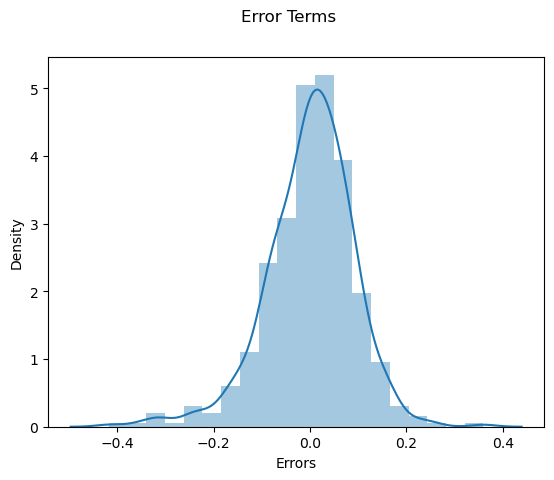

In [68]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms') 
plt.xlabel('Errors')

#### Error terms are following Normal Distribution.Errors are normally distribured here with mean 0. So everything seems to be fine


### Multi Colinearity

In [69]:
calculateVIF(X_train_new)

,Features,VIF
0,const,52.00
8,spring,4.76
3,temp,3.31
10,winter,3.11
9,summer,2.24
5,sep,1.17
4,windspeed,1.09
6,LightSnow,1.05
7,Misty,1.04
1,year,1.02


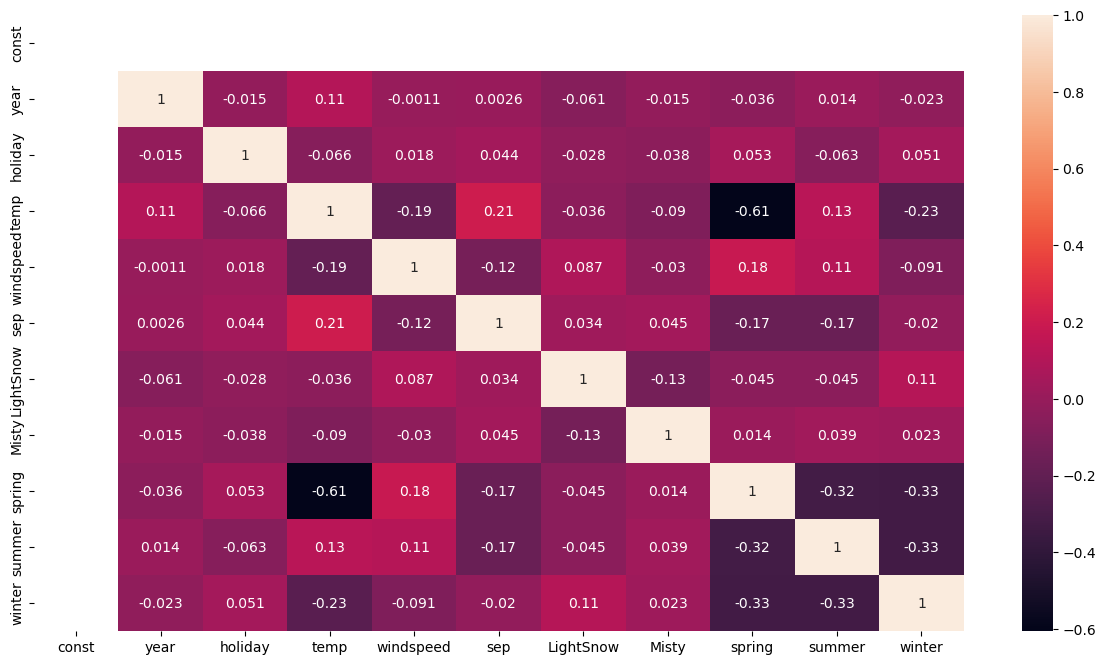

In [70]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True)
plt.show()

#### VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

### Linearity

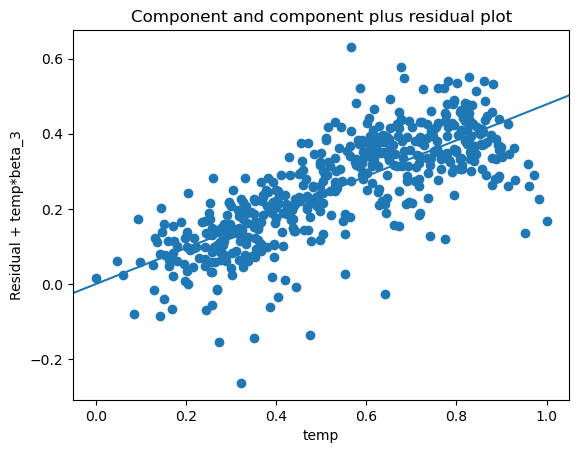

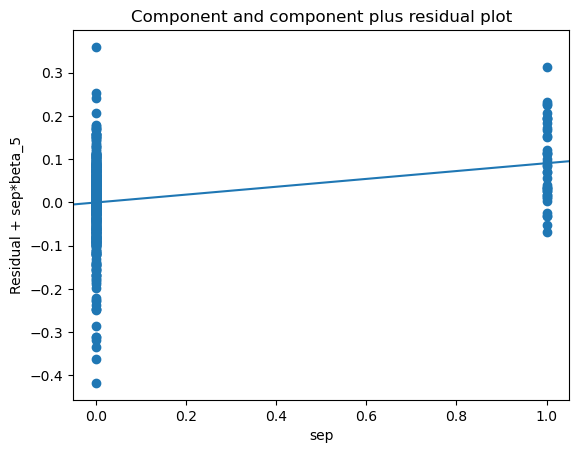

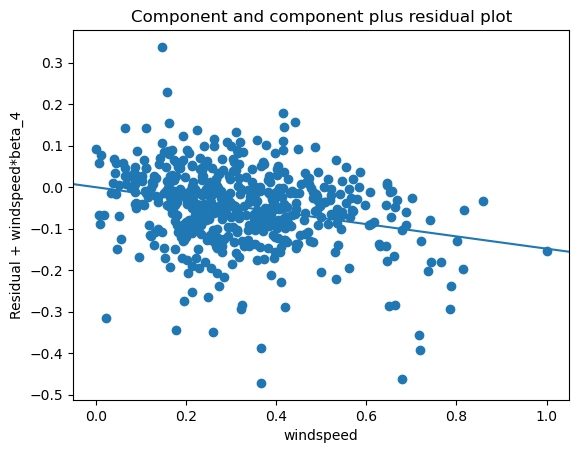

In [71]:
sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

#### We can clearly see linearity from the above plots

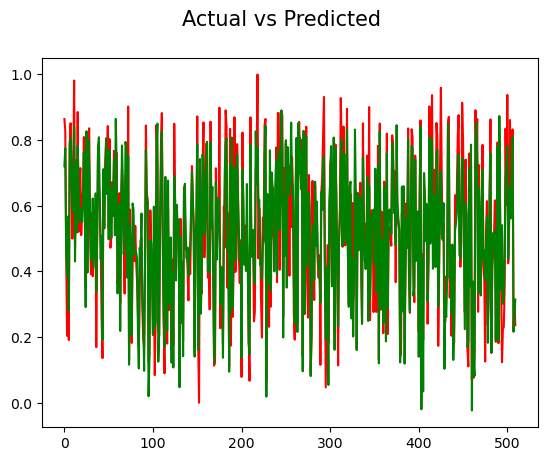

In [72]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="red")
plt.plot(c,y_train_pred, color="green")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.show()

#### Actual and Predicted result following almost the same pattern so this model seems ok


In [73]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.833170119099662

#### same as we calculated from the last model

## Making Predictions Using the Final Model



In [74]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,monday,saturday,sunday,thursday,tueday,wednesday,LightSnow,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [75]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,monday,saturday,sunday,thursday,tueday,wednesday,LightSnow,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()



<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        219 non-null    int64  
 1   holiday     219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   atemp       219 non-null    float64
 5   humidity    219 non-null    float64
 6   windspeed   219 non-null    float64
 7   aug         219 non-null    int64  
 8   dec         219 non-null    int64  
 9   feb         219 non-null    int64  
 10  jan         219 non-null    int64  
 11  july        219 non-null    int64  
 12  june        219 non-null    int64  
 13  mar         219 non-null    int64  
 14  may         219 non-null    int64  
 15  nov         219 non-null    int64  
 16  oct         219 non-null    int64  
 17  sep         219 non-null    int64  
 18  monday      219 non-null    int64  
 19  saturday    219 non-null    int64

In [77]:
common_cols = X_train_new.columns.intersection(X_test.columns)
X_test = X_test[common_cols]

# Add constant term
X_test_lm_6 = sm.add_constant(X_test)

print(X_test_lm_6.columns)

Index(['const', 'year', 'holiday', 'temp', 'windspeed', 'sep', 'LightSnow',
       'Misty', 'spring', 'summer', 'winter'],
      dtype='object')


In [78]:
y_pred = lr_6.predict(X_test_lm_6)

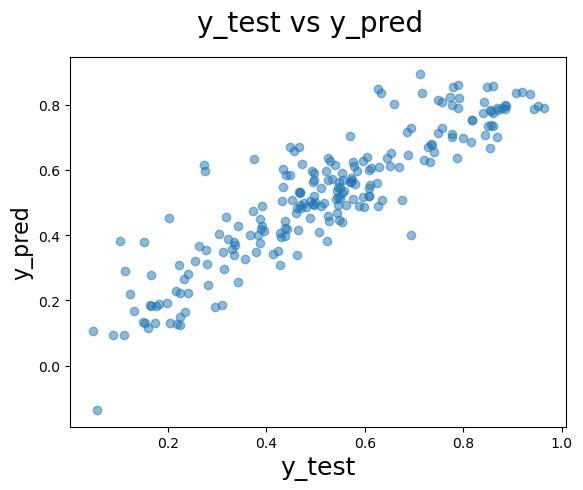

In [79]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### R^2 Value for TEST


In [80]:
r2_score(y_test, y_pred)

0.8035441330582012

### Adjusted R^2 Value for TEST


In [81]:
# We already have the value of R^2 (calculated in above step)

r2=0.8035441330582012

# Get the shape of X_test
X_test.shape


(219, 10)

In [82]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7940991394552301

## Final Result Comparison
#### Train R^2 : 0.833
#### Train Adjusted R^2 : 0.833
#### Test R^2 : 0.803
#### Test Adjusted R^2 : 0.794 
## This seems to be a really good model 

### The company should focus on the following features:

1. Company should focus on expanding business during Spring.
2. Company should focus on expanding business during September.
3. Based on previous data it is expected to have a boom in number of users once situation comes back to normal,     compared to 2019.
4. There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.